<a href="https://colab.research.google.com/github/cwang12197/cs_4774_ml/blob/main/CS_4774_Codeathon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codeathon 1: Comparison of Regression Models on Housing Prices in Ames, Iowa

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![(Image Credit Boston.gov)](https://miro.medium.com/max/1000/1*WYZCnpM7bE3Wq4NNxx7jDA.jpeg)

In this assignment, You are in charge of building a system to predict housing prices in Ames, Iowa. You need to find the best model given the Iowa Housing dataset, and then see if you can improve its performance further by tuning its hyperparameters.  You must evaluate your model using RMSE with 5-fold cross-validation. You can use Python’s Scikit-Learn API and Google Colab to present your solution and performance to your peers.

* **DOWNLOAD**: Download from Kaggle the Iowa Housing datasetLinks to an external site. in the [Ames Housing Dataset on Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data). You will attempt to predict the housing prices in Ames, IA. For references, you may refer to my slides or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same Colab workspace.

* **CODE**: Using this provided template, apply the 8 main steps of an ML project on the selected data set. Write code in a Google Colab, download as a .ipynb file and submit via GradeScope before the deadline. For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 50 pts. You will gain points depending on how you perform in the following sections.

* **PRESENT** (Optional): In a later class meeting, give a lightning talk to pitch your solution in 3-5 minutes. Prepare a presentation (in Google Slides) and email me the URL to be considered (3-5 submissions will be selected to present). You will earn 10 bonus points if you are not already one of the top 10 submissions.

**BONUS POINTS:** 10 bonus points will be given (as Extra credits) for those who score among the top-10 leaderboard while following strictly the assignment guidelines. Best of luck to all!

**IMPORTANT**: You must name your submission yourUVAID_codeathon_1.ipynb








## Step 1: Big Picture and Setup
Write a paragraph explaining the context of the problem in which you are trying to investigate. Your paragraph may frame the problem and objectives by answering the following questions:
* What is the task: regression, classification, clustering, visualization?
* What to expect, how to use, and how to benefit from this model?
* What performance measure to evaluate?
* How much data is available or should be collected?
* What learning algorithm to be used?
* How much effort is to be spent?
* Verify the assumptions that have been made about the context

For this project we are trying to predict housing prices in Iowa based on a variety of features such as lot area and number of bedrooms. The task is to create a regression model with the lowest RMSE (root mean square error) as the performance measure in making more accurate predictions. Through this we can expect to identify features of a house that prove more valuable and useful to the model, which translates to the housing price. For homeowners and real estate businesses, understanding what features are influential in price negotiations enables them to better make home valuations. With over 79 explanatory variables describing almost every aspect of a residence and thousands of records, the dataset provides sufficient data points to build and evaluate predictive models with some preprocessing. 

Any regression algorithm can be used, but some that can be explored are linear regression, decision trees, and random forests. Hyperparameter tuning will be performed to enhance the model performance further. The amount of computational power that I am using for this project is limited to the space provided in this Google Colab. 

Some assumptions include the dataset is clean and ready to use, but some effort may be required for preprocessing, feature engineering, and validation. Since this is a project for academic learning purposes, 1-2 weeks of effort should be enough to create a model that can adequately predict housing prices in Iowa, but for real-life agents this should be an ongoing project to minimize errors and gain competitive advantage in the housing market.



## Step 2: Load the Data
We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing values?
 * What are some basic statistics you can learn right away about this dataset?

- The file size is 0.44 MB
- There are 1460 entries in total
- Each entry has 81 features 
- There are categorical features within this dataset
- There are missing values 
- Some basic statistics you can learn right away about this dataset are the counts, mean, std, min, max, 25%, and 75% of each feature as shown below using the describe() function


In [11]:
import numpy as np # fundamental package for scientific computing
import os # to run file I/O operation
np.random.seed(42)

In [12]:
import pandas as pd

# To help you get started, a load function is provided below.
# You will need to fill in the code under #TODO to make it work.
def loadIowaHousingData():
  # The column names are adopted from the dataset page on Kaggle
  housing = pd.read_csv('train.csv')
  return housing

In [13]:
file_path = 'train.csv'
housing_file_size_mb = os.path.getsize(file_path) / (1024 * 1024)  # size in megabytes
housing = loadIowaHousingData()

print(f"File size: {housing_file_size_mb:.2f} MB")
print("Number of entries: " + str(len(housing)))
print("Number of features: " + str(len(housing.columns)))
print(housing.dtypes) # there exists categorical data
print(f"Does the dataset have missing values?  {housing.isnull().values.any()}")

print(housing.describe()) #print some basic statistics about the dataset


File size: 0.44 MB
Number of entries: 1460
Number of features: 81
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object
Does the dataset have missing values?  True
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.5000

<Axes: >

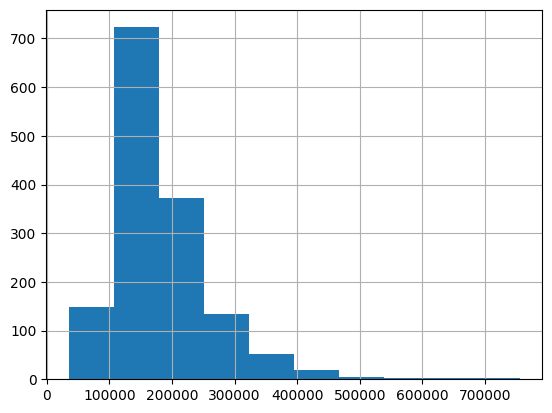

In [33]:
housing["SalePrice"].hist()

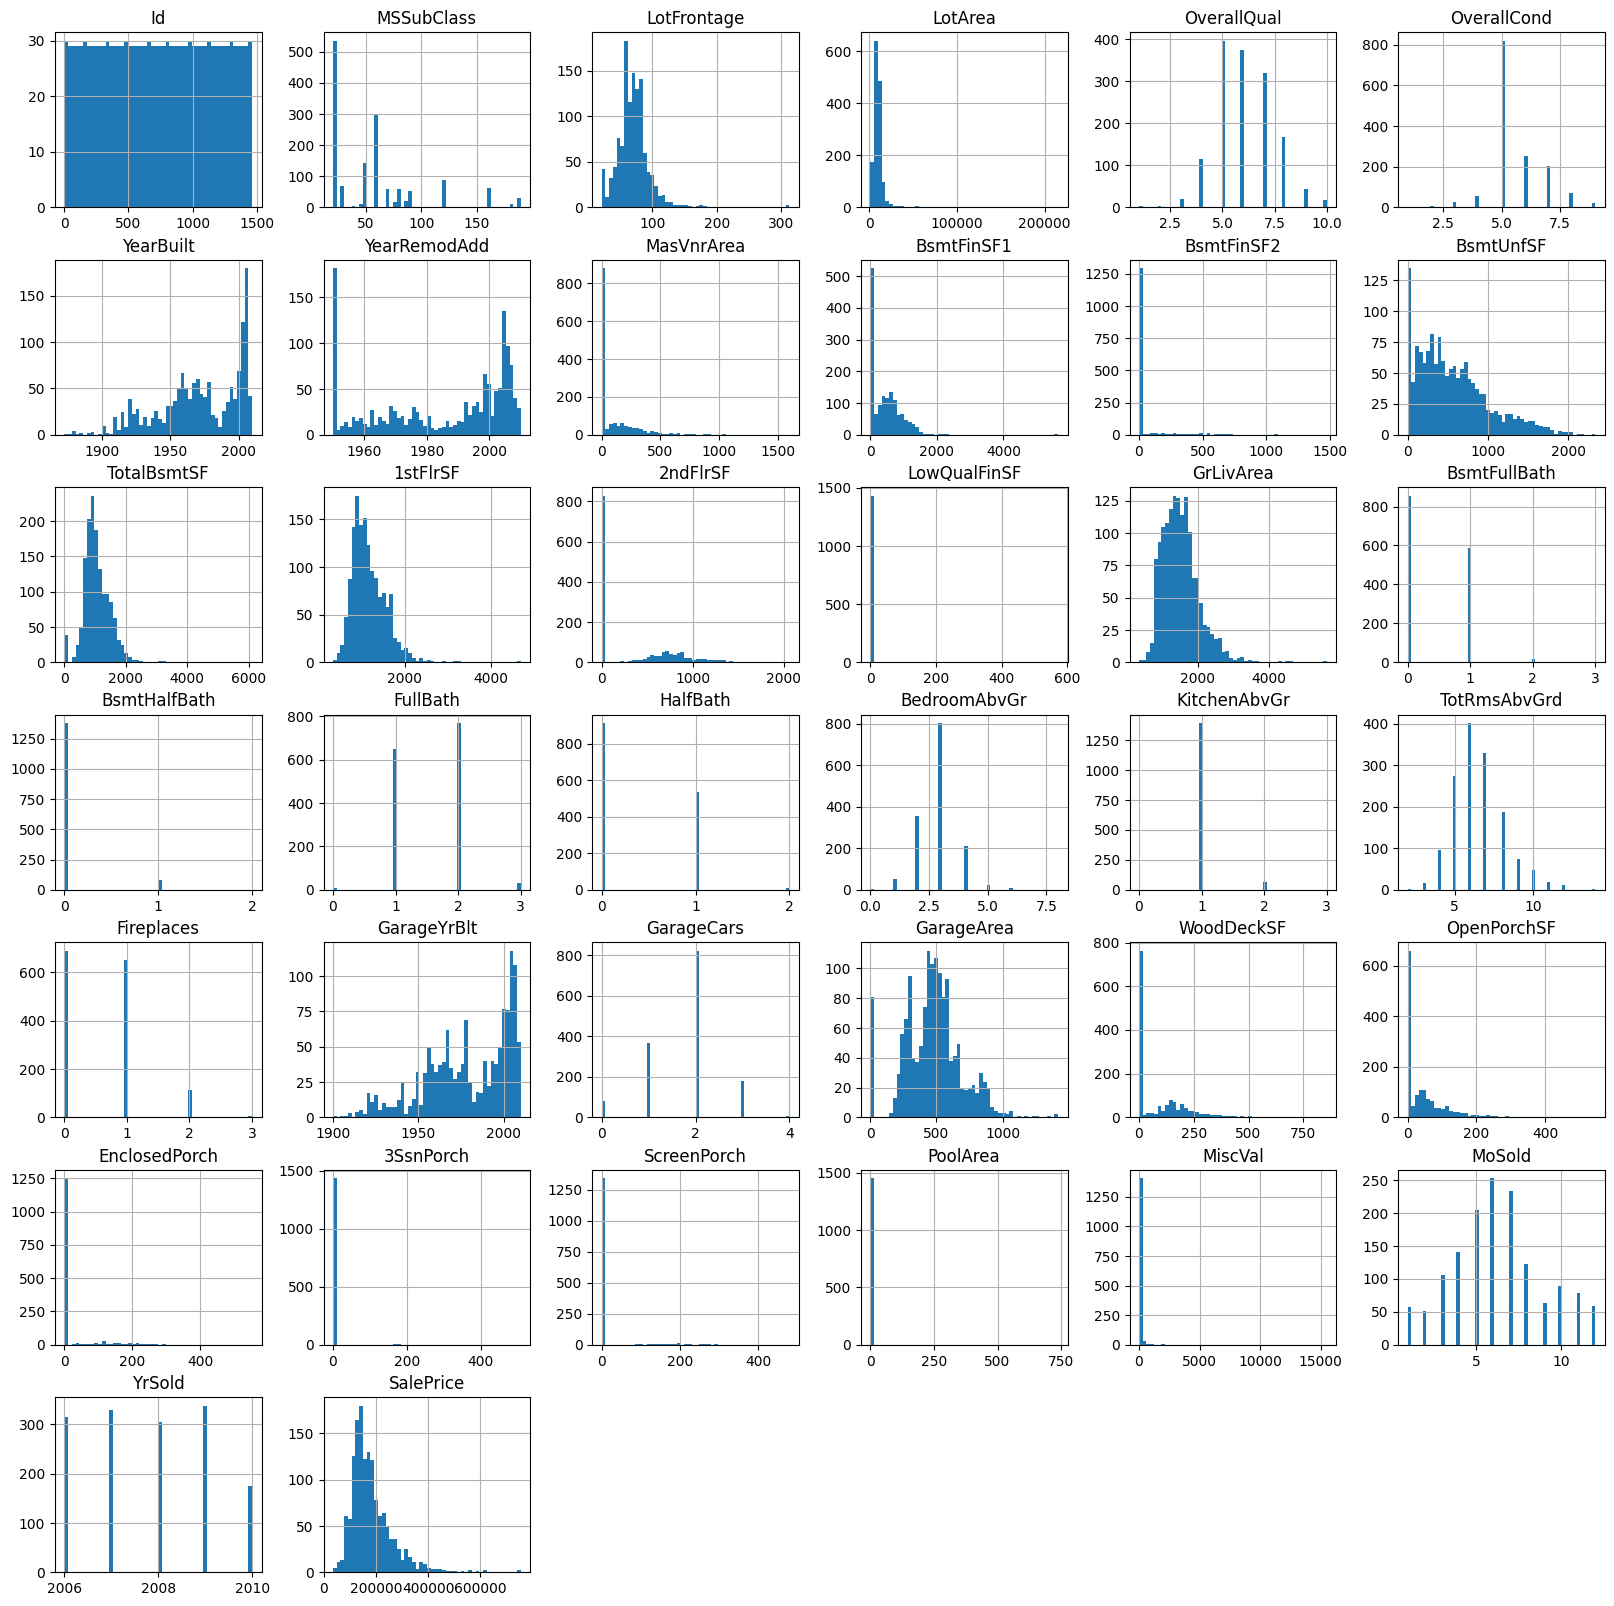

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,20))
plt.show()

## Step 3. Discover and visualize the data to gain insights
**Data Discovery:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than others. This information will help you confirm the weights of your regression model later on.

In [35]:
# Your code to visualize the data here
corr_matrix = housing.corr(numeric_only=True)
corr_matrix.shape

corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

array([[<Axes: xlabel='SalePrice', ylabel='SalePrice'>,
        <Axes: xlabel='GrLivArea', ylabel='SalePrice'>,
        <Axes: xlabel='GarageCars', ylabel='SalePrice'>,
        <Axes: xlabel='GarageArea', ylabel='SalePrice'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>],
       [<Axes: xlabel='SalePrice', ylabel='GrLivArea'>,
        <Axes: xlabel='GrLivArea', ylabel='GrLivArea'>,
        <Axes: xlabel='GarageCars', ylabel='GrLivArea'>,
        <Axes: xlabel='GarageArea', ylabel='GrLivArea'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='GrLivArea'>],
       [<Axes: xlabel='SalePrice', ylabel='GarageCars'>,
        <Axes: xlabel='GrLivArea', ylabel='GarageCars'>,
        <Axes: xlabel='GarageCars', ylabel='GarageCars'>,
        <Axes: xlabel='GarageArea', ylabel='GarageCars'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='GarageCars'>],
       [<Axes: xlabel='SalePrice', ylabel='GarageArea'>,
        <Axes: xlabel='GrLivArea', ylabel='GarageArea'>,
        <Axes: xlabel='Gar

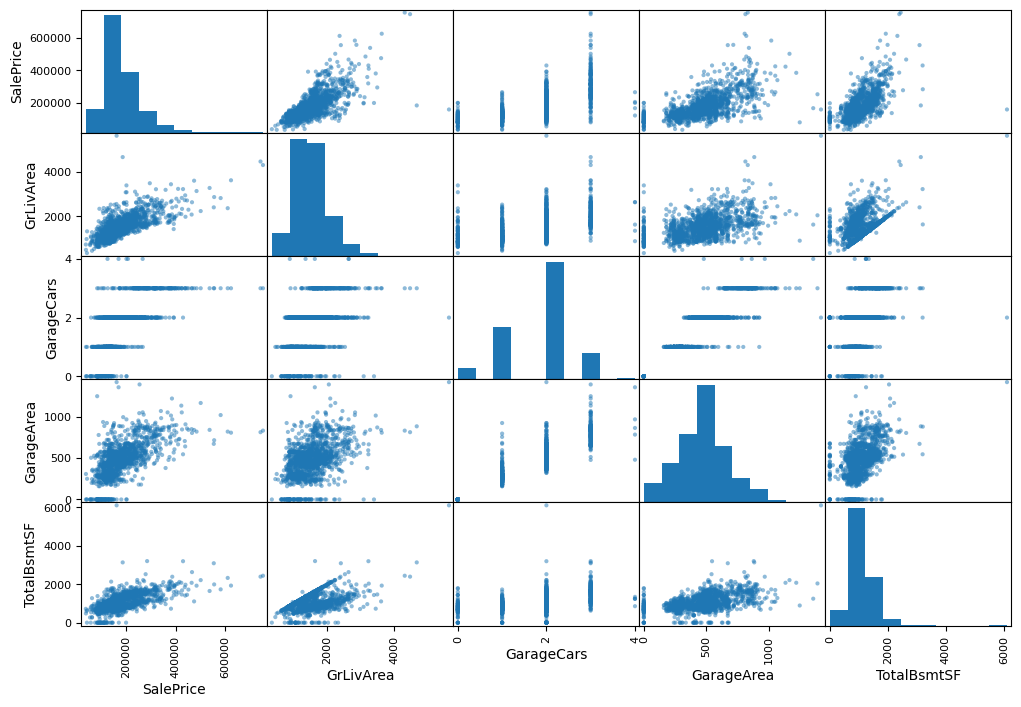

In [37]:
from pandas.plotting import scatter_matrix

attributes = ["SalePrice", "GrLivArea", "GarageCars",
              "GarageArea", "TotalBsmtSF"]
scatter_matrix(housing[attributes], figsize=(12, 8))

(np.float64(0.0), np.float64(4000.0), np.float64(0.0), np.float64(600000.0))

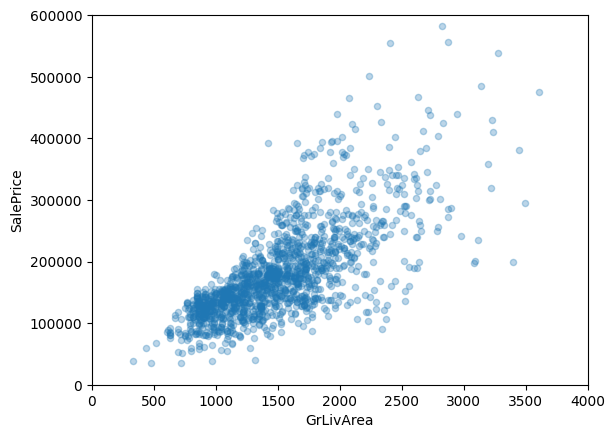

In [36]:
housing.plot(kind="scatter", x="GrLivArea", y="SalePrice",
             alpha=0.3)
plt.axis([0, 4000, 0, 600000])

(np.float64(0.0), np.float64(1000.0), np.float64(0.0), np.float64(600000.0))

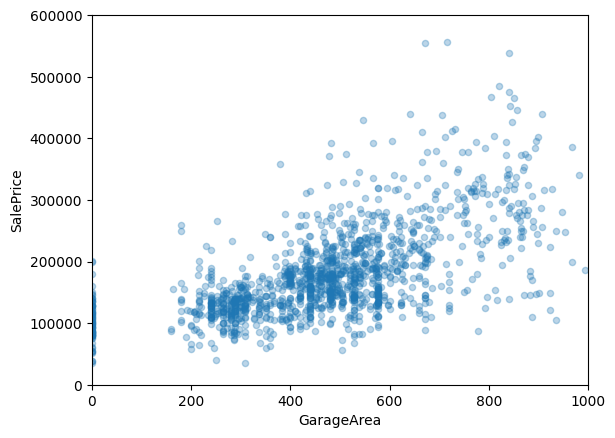

In [31]:
housing.plot(kind="scatter", x="GarageArea", y="SalePrice",
             alpha=0.3)
plt.axis([0, 1000, 0, 600000])

##  Step 4: Data Preparation and Cleaning
Since we can only use the "train.csv", you have to "artificially" split the data into training set, validation set, and test set. You may use the `train_test_split()` function *twice*: first is to split into train and test, then to split the train again into training and validation sets.

Next, you need to construct the following:

* **Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the `Imputer` class.

* **Feature Scaling:** Your task is to call the `StandardScaler` to normalize the value of each feature.

* **Transformation Pipeline:** More importantly, you will need to integrate the above operations into a `Pipeline` to process and transform the training data (via `fit_transform()`), then use the same pipeline to transform any validation and testing data (using `transform()` only).

In [38]:
from sklearn.model_selection import train_test_split
# Split the data into train set (80%) and test set (20%)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print( train_set.shape )
print( test_set.shape ) 

(1168, 81)
(292, 81)


In [ ]:
# Your code check for missing values, feature scaling, and put all transformation into a pipeline here


## Step 5: Model Selection
You should use (at the minimum) the basic ML models which we’ve covered: `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. Optionally, you may go for the extra miles by doing some research and try some more advanced models (ie. `Artificial Neural Networks`). You may use `RMSE` as the performance measure.

You must use 5-fold CV on the data set to evaluate the performance of your models (following the sample codes on Colab 02).


In [ ]:
# Try a few models here



## Step 6: Model Tuning

In this step, you should attempt to use one of the provided tools for hyperparameter tuning: `GridSearchCV`, `RandomizedSearchCV` to identify the best set of hyperparameters for your model. After tweaking your models, you eventually should report the 5-fold CV RMSE of your tuned model.

## Step 7: Solution Presentation
Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/supervisor). Focus on answering the following:

* How can you pitch your solution to this project?
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution?

## Step 8: Model Launching, Monitoring, and Updating
You don't need to do anything for this step. However, in the real-world, this is an iterative process where you launch, monitor, and update your model (on the cloud).

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my slides and/or the textbook
 * Talk to the TA, they are available and there to help you during their office hours
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Codeathon 1:...".

Best of luck and have fun!